<a href="https://colab.research.google.com/github/OmarMachuca851/Task/blob/main/pln.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Procesamiento del Lenguaje Natural (PLN)

## Problema 1: Implementación de BoW desde Scratch

In [ ]:
import numpy as np
import pandas as pd
import re
res = ["This movie is SOOOO funny!!!",
     "What a movie! I never",
      "best movie ever!!!!! this movie"]

def CountVectorizer(res, ngrams = 1):
    bow = {}
    for i, l in enumerate(res):
        l = l.lower()
        l = re.sub(r"[^a-z ]", "", l)
        words = l.split()
        if ngrams > 1:
            w = []
            for j in range(len(words)):
                j_end = j + ngrams
                if j_end > len(words):
                    break
                w.append(" ".join(words[j: j_end]))

            words = w

        for word in words:
            if not word in bow.keys():
                bow[word] = np.zeros(len(res)).astype(np.int32)
            bow[word][i] += 1

    return bow

bow = CountVectorizer(res)
pd.DataFrame.from_dict(bow)

,this,movie,is,soooo,funny,what,a,i,never,best,ever
0,1,1,1,1,1,0,0,0,0,0,0
1,0,1,0,0,0,1,1,1,1,0,0
2,1,2,0,0,0,0,0,0,0,1,1


In [ ]:
bow2 = CountVectorizer(res, ngrams=2)
pd.DataFrame.from_dict(bow2)

,this movie,movie is,is soooo,soooo funny,what a,a movie,movie i,i never,best movie,movie ever,ever this
0,1,1,1,1,0,0,0,0,0,0,0
1,0,0,0,0,1,1,1,1,0,0,0
2,1,0,0,0,0,0,0,0,1,1,1


In [ ]:
bow2 = CountVectorizer(res, ngrams=3)
pd.DataFrame.from_dict(bow2)

,this movie is,movie is soooo,is soooo funny,what a movie,a movie i,movie i never,best movie ever,movie ever this,ever this movie
0,1,1,1,0,0,0,0,0,0
1,0,0,0,1,1,1,0,0,0
2,0,0,0,0,0,0,1,1,1


## Problema 2: Cálculo de TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import load_files
import nltk

train_review = load_files('./data/aclImdb/train/', encoding='utf-8')
t_train, y_train = train_review.data, train_review.target

test_review = load_files('./data/aclImdb/test/', encoding='utf-8')
t_test, y_test = test_review.data, test_review.target

# ラベルの0,1と意味の対応の表示
print(train_review.target_names)
print("x : {}".format(t_test[0]))

['neg', 'pos']
x : Don't hate Heather Graham because she's beautiful, hate her because she's fun to watch in this movie. Like the hip clothing and funky surroundings, the actors in this flick work well together. Casey Affleck is hysterical and Heather Graham literally lights up the screen. The minor characters - Goran Visnjic {sigh} and Patricia Velazquez are as TALENTED as they are gorgeous. Congratulations Miramax & Director Lisa Krueger!


In [ ]:
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    stop_words=list(stop_words),
    lowercase=True)

x_train = tfidf_vectorizer.fit_transform(t_train)
x_test = tfidf_vectorizer.transform(t_test)

## Problema 3: Aprendizaje mediante TF-IDF

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Building model
model = Sequential([
    Dense(200, activation='relu', input_shape=(5000, )),
    Dense(100, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compiling and training
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, validation_split=0.1)
model.evaluate(x_test, y_test)

Train on 22500 samples, validate on 2500 samples
Epoch 1/10
22500/22500 [==============================] - 1s 63us/sample - loss: 0.3320 - acc: 0.8591 - val_loss: 0.2899 - val_acc: 0.8780
Epoch 2/10
22500/22500 [==============================] - 1s 57us/sample - loss: 0.2097 - acc: 0.9163 - val_loss: 0.3058 - val_acc: 0.8784
Epoch 3/10
22500/22500 [==============================] - 1s 56us/sample - loss: 0.1277 - acc: 0.9525 - val_loss: 0.3538 - val_acc: 0.8724
Epoch 4/10
22500/22500 [==============================] - 1s 56us/sample - loss: 0.0339 - acc: 0.9894 - val_loss: 0.5533 - val_acc: 0.8744
Epoch 5/10
22500/22500 [==============================] - 1s 56us/sample - loss: 0.0045 - acc: 0.9993 - val_loss: 0.7467 - val_acc: 0.8752
Epoch 6/10
22500/22500 [==============================] - 1s 55us/sample - loss: 7.0787e-04 - acc: 1.0000 - val_loss: 0.8601 - val_acc: 0.8760
Epoch 7/10
22500/22500 [==============================] - 1s 56us/sample - loss: 2.2774e-04 - acc: 1.0000 - val_l

[1.3112242875173687, 0.85388]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import load_files
import nltk

for i in range(len(t_train)):
        t_train[i] = re.sub(r"[^a-z ]", "", t_train[i])

for i in range(len(t_test)):
        t_test[i] = re.sub(r"[^a-z ]", "", t_test[i])

stop_words = set(stopwords.words('english'))
tfidf_vectorizer = TfidfVectorizer(
    max_features=20000,
    stop_words=list(stop_words),
    lowercase=True,
    ngram_range=(1, 3),
    min_df=2,
    max_df=0.85
)

x_train = tfidf_vectorizer.fit_transform(t_train)
x_test = tfidf_vectorizer.transform(t_test)

In [ ]:
# Building model
model2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10000, )),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compiling and training
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.fit(x_train, y_train, epochs=10, validation_split=0.1)
model2.evaluate(x_test, y_test)

Train on 22500 samples, validate on 2500 samples
Epoch 1/10
22500/22500 [==============================] - 3s 136us/sample - loss: 0.3197 - acc: 0.8610 - val_loss: 0.2767 - val_acc: 0.8820
Epoch 2/10
22500/22500 [==============================] - 3s 125us/sample - loss: 0.1346 - acc: 0.9510 - val_loss: 0.3507 - val_acc: 0.8728
Epoch 3/10
22500/22500 [==============================] - 3s 124us/sample - loss: 0.0299 - acc: 0.9896 - val_loss: 0.5220 - val_acc: 0.8740
Epoch 4/10
22500/22500 [==============================] - 3s 124us/sample - loss: 0.0037 - acc: 0.9993 - val_loss: 0.7383 - val_acc: 0.8732
Epoch 5/10
22500/22500 [==============================] - 3s 122us/sample - loss: 4.6563e-04 - acc: 0.9999 - val_loss: 0.8837 - val_acc: 0.8712
Epoch 6/10
22500/22500 [==============================] - 3s 123us/sample - loss: 1.3118e-04 - acc: 1.0000 - val_loss: 1.0079 - val_acc: 0.8712
Epoch 7/10
22500/22500 [==============================] - 3s 122us/sample - loss: 6.5944e-05 - acc: 1.0

[1.4268868658915161, 0.86008]

## Problema 4: Implementación Scratch de TF-IDF

In [ ]:
def Tfidf(res, ngrams = 1):
    bow = {}
    for i, l in enumerate(res):
        l = l.lower()
        l = re.sub(r"[^a-z ]", "", l)
        words = l.split()
        if ngrams > 1:
            w = []
            for j in range(len(words)):
                j_end = j + ngrams
                if j_end > len(words):
                    break
                w.append(" ".join(words[j: j_end]))

            words = w

        for word in words:
            if not word in bow.keys():
                bow[word] = np.zeros(len(res))
            bow[word][i] += 1/len(words)
    #idf = []
    N = len(res)
    for w in bow:
        df = np.sum(wr > 0 for wr in bow[w])
        idf = np.log(N / df)
        bow[w] *= idf
    print(idf)
    return bow

bow = Tfidf(res, ngrams=1)
pd.DataFrame(bow)

1.0986122886681098


/home/omar/workspace/miniconda3/envs/tf115/lib/python3.7/site-packages/ipykernel_launcher.py:24: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


,this,movie,is,soooo,funny,what,a,i,never,best,ever
0,0.081093,0.0,0.219722,0.219722,0.219722,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.0,0.000000,0.000000,0.000000,0.219722,0.219722,0.219722,0.219722,0.000000,0.000000
2,0.081093,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.219722,0.219722


## Problema 5: Preprocesamiento del corpus

In [ ]:
def preprocess_text(res):
    prep_text = []
    for text in res:
        text = text.lower()
        text = re.sub(r"[^a-zA-Z\s']", '', text)
        text = re.sub(r'\s+', ' ', text).strip()
        vtext = text.split()
        prep_text.append(vtext)
    return prep_text

tokensV = preprocess_text(res)
tokensV

[['this', 'movie', 'is', 'soooo', 'funny'],
 ['what', 'a', 'movie', 'i', 'never'],
 ['best', 'movie', 'ever', 'this', 'movie']]

## Problema 6: Aprendiendo Word2Vec

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(min_count=1)
model.build_vocab(tokensV) # 準備
model.train(tokensV, total_examples=model.corpus_count, epochs=model.epochs) # 学習

print(": {}".format(list(model.wv.index_to_key)))

: ['movie', 'this', 'ever', 'best', 'never', 'i', 'a', 'what', 'funny', 'soooo', 'is']


## Problema 7: (Avanzado) Visualización vectorial

/home/omar/workspace/miniconda3/envs/tf115/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/home/omar/workspace/miniconda3/envs/tf115/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


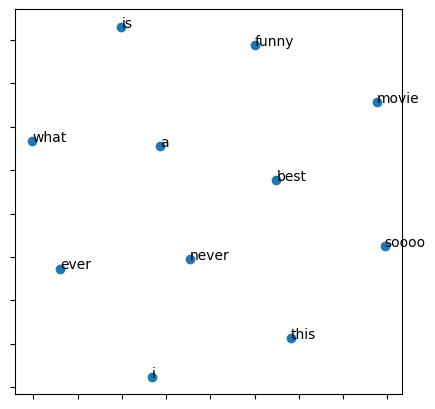

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

vocabs = model.wv.index_to_key

tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
vectors_tsne = tsne_model.fit_transform(model.wv[vocabs])

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(list(vocabs)):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

In [ ]:
model.wv.most_similar(positive="funny", topn=3)

[('ever', 0.1991206258535385),
 ('best', 0.07497532665729523),
 ('i', 0.06059185415506363)]

## Problema 8: (Tarea avanzada) Clasificación de reseñas de películas usando Word2Vec

In [ ]:
Vtokens_train = preprocess_text(t_train)

model = Word2Vec(min_count=1, vector_size=100)
model.build_vocab(Vtokens_train)
model.train(Vtokens_train, total_examples=model.corpus_count, epochs=model.epochs)

(21942921, 28970445)

In [ ]:
def document_vector(tokens, model):
    """
    Crea un vector para un documento promediando los vectores de sus palabras
    """
    # Filtrar palabras que están en el vocabulario de Word2Vec
    words = [word for word in tokens if word in model.wv.key_to_index]

    if len(words) == 0:
        return np.zeros(model.vector_size)

    # Promediar los vectores de las palabras
    return np.mean([model.wv[word] for word in words], axis=0)

# Crear embeddings para todas las reseñas
X = np.array([document_vector(t, model) for t in t_train])
print(f"Shape de X: {X.shape}")
y = y_train
print(f"Shape de y: {y.shape}")

Shape de X: (25000, 100)
Shape de y: (25000,)


In [ ]:
x_train, x_test, y_train1, y_test1 = train_test_split(X, y)
# Building model
model2 = Sequential([
    Dense(100, activation='relu', input_shape=(100, )),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compiling and training
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.fit(x_train, y_train1, epochs=10, validation_split=0.1)
model2.evaluate(x_test, y_test1)

Train on 16875 samples, validate on 1875 samples
Epoch 1/10
16875/16875 [==============================] - 1s 72us/sample - loss: 0.6906 - acc: 0.5281 - val_loss: 0.6837 - val_acc: 0.5643
Epoch 2/10
16875/16875 [==============================] - 1s 49us/sample - loss: 0.6850 - acc: 0.5516 - val_loss: 0.6803 - val_acc: 0.5696
Epoch 3/10
16875/16875 [==============================] - 1s 45us/sample - loss: 0.6829 - acc: 0.5609 - val_loss: 0.6728 - val_acc: 0.5851
Epoch 4/10
16875/16875 [==============================] - 1s 41us/sample - loss: 0.6785 - acc: 0.5716 - val_loss: 0.6703 - val_acc: 0.5808
Epoch 5/10
16875/16875 [==============================] - 1s 41us/sample - loss: 0.6748 - acc: 0.5788 - val_loss: 0.6651 - val_acc: 0.5957
Epoch 6/10
16875/16875 [==============================] - 1s 41us/sample - loss: 0.6702 - acc: 0.5896 - val_loss: 0.6652 - val_acc: 0.6037
Epoch 7/10
16875/16875 [==============================] - 1s 42us/sample - loss: 0.6669 - acc: 0.5950 - val_loss: 0.6

[0.6647200886154174, 0.60608]